# IMPORT & SETUP

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, \
    f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


In [270]:
file_path = 'dataset/train.csv'
data = pd.read_csv(file_path)

features_used = ['Inherited from father', 'Maternal gene', 'Paternal gene', 'Genes in mother\'s side', 'Symptom 1',
                 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']
targets = ['Genetic Disorder', 'Disorder Subclass']

dataset = data.loc[:, features_used + targets].dropna(subset=['Genetic Disorder', 'Disorder Subclass'], how='all')
# Fill missing values in 'Genetic Disorder' based on 'Disorder Subclass'
subclass_to_disorder = {
    'Leber\'s hereditary optic neuropathy': 'Mitochondrial genetic inheritance disorders',
    'Leigh syndrome': 'Mitochondrial genetic inheritance disorders',
    'Mitochondrial myopathy': 'Mitochondrial genetic inheritance disorders',
    'Alzheimer\'s': 'Multifactorial genetic inheritance disorders',
    'Cancer': 'Multifactorial genetic inheritance disorders',
    'Diabetes': 'Multifactorial genetic inheritance disorders',
    'Cystic fibrosis': 'Single-gene inheritance diseases',
    'Hemochromatosis': 'Single-gene inheritance diseases',
    'Tay-Sachs': 'Single-gene inheritance diseases',
}

dataset['Genetic Disorder'] = dataset.apply(
    lambda row: subclass_to_disorder[row['Disorder Subclass']]
    if pd.isna(row['Genetic Disorder']) else row['Genetic Disorder'],
    axis=1
)
dataset = dataset.drop(['Disorder Subclass'], axis=1)
# dataset = dataset.dropna(subset=['Disorder Subclass'], how='all')

# CATEGORIAL BINARY
dataset["Genes in mother's side"] = dataset["Genes in mother's side"].replace({'Yes': 1.0, 'No': 0.0})
dataset['Inherited from father'] = dataset['Inherited from father'].replace({'No': 0.0, 'Yes': 1.0})
dataset['Maternal gene'] = dataset['Maternal gene'].replace({'No': 0.0, 'Yes': 1.0})
dataset["Paternal gene"] = dataset["Paternal gene"].replace({'Yes': 1.0, 'No': 0.0})
# dataset[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']] = dataset[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']].fillna(-1)
# dataset = dataset.dropna(subset=['Symptom 4', 'Symptom 5'])
#-------------------------------------------------------%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--------------------------------#
genetic_disorder_mapping = {
    'Mitochondrial genetic inheritance disorders': 1,
    'Multifactorial genetic inheritance disorders': 0,
    'Single-gene inheritance diseases': 2,
}
dataset['Genetic Disorder'] = dataset['Genetic Disorder'].map(genetic_disorder_mapping)

# disorder_subclass_mapping = {
#     "Leber's hereditary optic neuropathy": 0,
#     'Cystic fibrosis': 1,
#     'Diabetes': 2,
#     'Leigh syndrome': 3,
#     'Tay-Sachs': 4,
#     'Mitochondrial myopathy': 5,
#     'Hemochromatosis': 6,
#     "Alzheimer's": 7,
#     'Cancer': 8,
# }
# 
# dataset['Disorder Subclass'] = dataset['Disorder Subclass'].map(disorder_subclass_mapping)
heat_data = dataset.copy().dropna()

,Inherited Father,Maternal gene,Paternal gene,Inherited Mother,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder
Inherited from father,0.00,0.01,0.10,0.02,0.01,0.00,0.00,0.01,0.03,0.08
Maternal gene,0.01,0.00,0.01,0.10,0.01,0.00,0.01,0.02,0.02,0.06
Paternal gene,0.10,0.01,0.00,0.02,0.00,0.02,0.02,0.01,0.01,0.04
Genes in mother's side,0.02,0.10,0.02,0.00,0.00,0.00,0.02,0.00,0.02,0.07
Symptom 1,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.09
Symptom 2,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.01,0.01,0.12
Symptom 3,0.00,0.01,0.02,0.02,0.01,0.01,0.00,0.01,0.03,0.13
Symptom 4,0.01,0.02,0.01,0.00,0.00,0.01,0.01,0.00,0.03,0.15
Symptom 5,0.03,0.02,0.01,0.02,0.02,0.01,0.03,0.03,0.00,0.17
Genetic Disorder,0.08,0.06,0.04,0.07,0.09,0.12,0.13,0.15,0.17,0.00


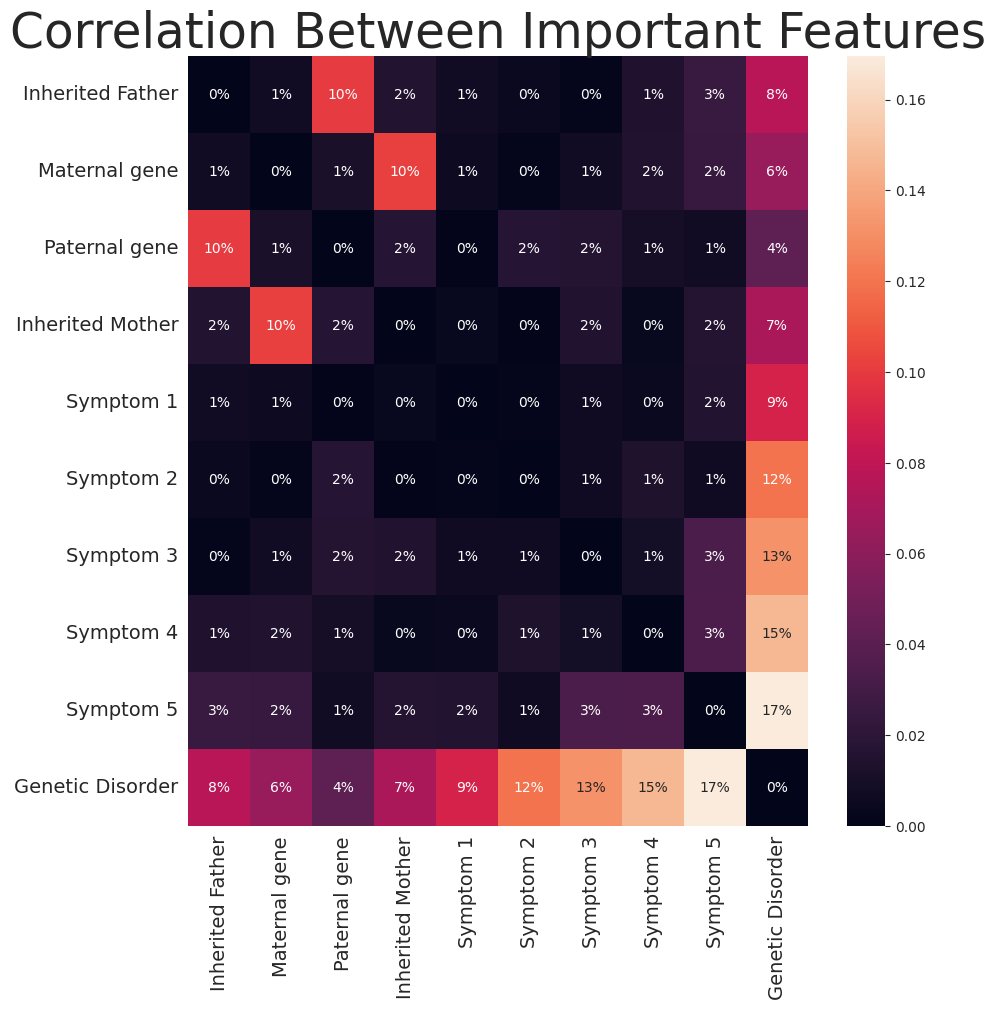

In [291]:
corr = heat_data.corr().applymap(lambda x: 0 if x > 0.99 else abs(x)).rename({'Inherited from father': 'Inherited Father', 'Genes in mother\'s side': 'Inherited Mother'})
plt.figure(figsize=(10, 10))
sns.heatmap(corr.rename({'Inherited from father': 'Inherited Father', 'Genes in mother\'s side': 'Inherited Mother'}, axis=1),
    annot=True, fmt=".0%")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title('Correlation Between Important Features', fontsize=35)
# plt.show()
plt.savefig('correlation.png', transparent=True, bbox_inches='tight')

In [262]:
robust_scaler = RobustScaler()

X_train, X_test, Y_train, Y_test = train_test_split(robust_scaler.fit_transform(heat_data.loc[:, heat_data.columns != 'Genetic Disorder']),
                                                    heat_data.loc[:, 'Genetic Disorder'],
                                                    test_size=0.2, random_state=43)

In [240]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
lp_models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
lp_models

100%|██████████| 29/29 [00:20<00:00,  1.42it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 11005, number of used features: 10
[LightGBM] [Info] Start training from score -2.267321
[LightGBM] [Info] Start training from score -0.671484
[LightGBM] [Info] Start training from score -0.953315


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.65,0.60,None,0.65,0.14
ExtraTreeClassifier,0.65,0.60,None,0.64,0.02
DecisionTreeClassifier,0.64,0.60,None,0.64,0.02
ExtraTreesClassifier,0.64,0.60,None,0.64,0.36
LabelSpreading,0.65,0.60,None,0.64,5.40
LabelPropagation,0.64,0.60,None,0.64,3.92
NearestCentroid,0.49,0.60,None,0.49,0.08
RandomForestClassifier,0.64,0.58,None,0.64,0.36
XGBClassifier,0.65,0.58,None,0.64,0.17


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [5, 20, 50, 100, 200, 400, 800]  # number of trees in the random forest
max_features = ['sqrt']  # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 500, num=12)]  # maximum number of levels allowed in each decision tree
min_samples_split = [2, 4, 6, 8, 10]  # minimum sample number to split a node
min_samples_leaf = [1, 3, 4, 6]  # minimum sample number that can be stored in a leaf node
bootstrap = [True, False]  # method used to sample data points

random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'min_samples_split': min_samples_split,

               'min_samples_leaf': min_samples_leaf,

               'bootstrap': bootstrap}
## Importing Random Forest Classifier from the sklearn.ensemble

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=100, cv=5, verbose=2, random_state=35, n_jobs=-1)

rf_random.fit(X_train, Y_train)


In [89]:
print('Random grid: ', random_grid, '\n')
print('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 200, 400, 800], 'max_features': ['sqrt'], 'max_depth': [10, 54, 99, 143, 188, 232, 277, 321, 366, 410, 455, 500], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 3, 4, 6], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 54, 'bootstrap': True}  


In [263]:

model = RandomForestClassifier(bootstrap=True, max_depth=54, max_features='sqrt',
                               min_samples_leaf=6, min_samples_split=4, n_estimators=400)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


In [264]:

f1_score(Y_test, y_pred, average='macro'), accuracy_score(Y_test, y_pred), precision_score(Y_test, y_pred,
                                                                                           average='macro'), recall_score(
    Y_test, y_pred, average='macro')

(0.5795392131921996,
 0.6522442377678932,
 0.5979068112802829,
 0.5682137007905479)

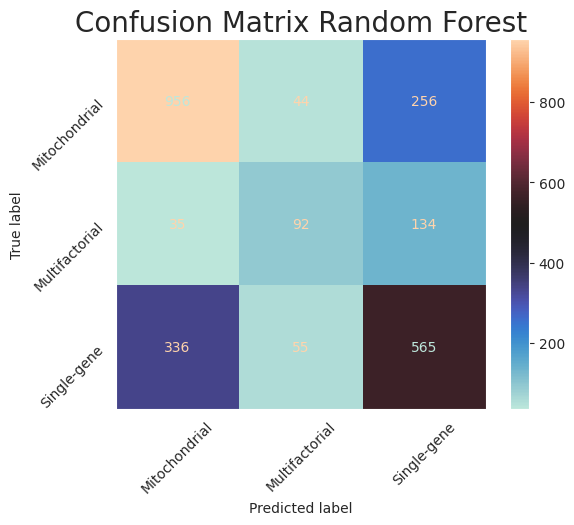

In [296]:
genetic_disorder_mapping_2 = {
    'Mitochondrial': 0,
    'Multifactorial': 1,
    'Single-gene': 2,
}

inv_dict = {v: k for k, v in genetic_disorder_mapping_2.items()}

cm = confusion_matrix([inv_dict[i] for i in Y_test], [inv_dict[i] for i in y_pred],
                      labels=[inv_dict[i] for i in model.classes_])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[inv_dict[i] for i in model.classes_])
disp.plot(cmap='warm', ax=None)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(False)
plt.title('Confusion Matrix Random Forest', fontsize=20)
plt.savefig('confusion_matrix.png', transparent=True, bbox_inches='tight')
plt.show()


In [249]:
model.classes_

array([0, 1, 2])

In [267]:
from sklearn.metrics import precision_recall_fscore_support as score

scores = score(Y_test, y_pred) * np.array([100, ])
precision, recall, fscore, support = scores

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))


precision: [72.04220045 48.16753927 59.16230366]
recall: [76.11464968 35.24904215 59.10041841]
fscore: [74.02245451 40.7079646  59.13134485]


In [216]:
np.mean(precision_avg, recall_avg, fscore_avg)

TypeError: integer argument expected, got float

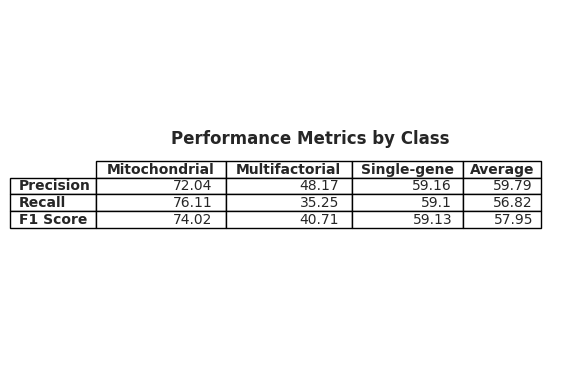

In [269]:
from matplotlib.font_manager import FontProperties

# Calculate row averages
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
fscore_avg = np.mean(fscore)

# Create a figure and axis
fig, ax = plt.subplots()

table_data_transposed = [[round(i, 2) for i in list(precision) + [precision_avg,]],
                         [round(i, 2) for i in list(recall) + [recall_avg,]],
                         [round(i, 2) for i in list(fscore) + [fscore_avg,]],
                         ]

# Create the table with rows and columns inverted
table = plt.table(cellText=table_data_transposed,
                  rowLabels=['Precision', 'Recall', 'F1 Score'],
                  colLabels=['Mitochondrial', 'Multifactorial', 'Single-gene', 'Average'],
                  loc='center')

# Style the headers to make them bold
# Style the headers to make them bold
for (row, col), cell in table.get_celld().items():
    if (row == 0) or (col == -1):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

# Style the table
table.auto_set_column_width(col=list(range(len(table_data_transposed[0]))))
# table.auto_set_row_height(row=list(range(len(table_data_transposed))))

table.set_fontsize(10)
# table.scale(1, 1)
# table.fit_text = True

# Hide the axes
ax.axis('off')
# ax.set_title('Label Scores', fontsize=20)
# plt.title('Label Scores', fontsize=20)

plt.suptitle('Performance Metrics by Class', fontsize=12, weight='bold', y=0.63)
plt.savefig('table.png', transparent=True, bbox_inches='tight')
# Display the plot
plt.show()


In [213]:
fscore

58.163577341102744

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

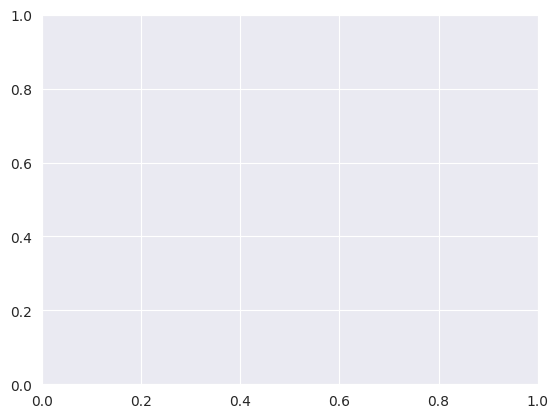

In [186]:
# Calculate row averages
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
fscore_avg = np.mean(fscore)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the table with rows and columns inverted
table_data = [
    ['Mitochondrial', round(precision[0], 2), round(recall[0], 2), round(fscore[0], 2)],
    [round(precision[1], 2), round(recall[1], 2), round(fscore[1], 2)],
    [round(precision[2], 2), round(recall[2], 2), round(fscore[2], 2)],
    [round(precision_avg, 2), round(recall_avg, 2), round(fscore_avg, 2)],
]

# Transpose the table_data array
table_data_transposed = np.array(table_data).T.tolist()

table = ax.table(
    cellText=table_data_transposed,
    rowLabels=['Label', 'Precision', 'Recall', 'F1 Score'],
    # colLabels=['Class 1', 'Class 2', 'Class 3'],
    loc='center',
    cellLoc='center'
)

# Style the headers to make them bold
# Style the headers to make them bold
for i in range(len(table_data_transposed[0])):
    table[0, i].get_text().set_weight('bold')

for i in range(len(table_data_transposed)):
    table[i, -1].get_text().set_weight('bold')

# Style the table
table.auto_set_column_width(col=list(range(len(table_data_transposed[0]))))
# table.auto_set_row_height(row=list(range(len(table_data_transposed))))

table.set_fontsize(10)
# table.scale(1, 1)
# table.fit_text = True

# Hide the axes
ax.axis('off')
# ax.set_title('Label Scores', fontsize=20)
# plt.title('Label Scores', fontsize=20)

plt.suptitle('Performance Metrics by Class', fontsize=12, weight='bold', y=0.61)
plt.savefig('table.png', transparent=True, bbox_inches='tight')
# Display the plot
plt.show()